## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import  matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [3]:
x = np.linspace(0,20)
y = (-2*x)+1



#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
import numpy as np


def gradient_descent(x,y,n,theta0,theta1,eta):
    n_iter = 0
    m = len(x)
    x0 = np.ones(m)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_list = []
    for i in range(n):
        hypo = theta0*x0 + theta1*x
        hypo_list.append(hypo)
        cost_func = (1/2*m) * np.sum(np.square(hypo-y))
        diff_theta0 = (1/m) * np.sum((hypo-y)*x0)
        diff_theta1 = (1/m) * np.sum((hypo-y)*x)
        gradient = (diff_theta0**2 + diff_theta1**2)**.5
        theta0 = theta0 - eta * diff_theta0
        theta1 = theta1 - eta * diff_theta1
        cost_lst.append(cost_func)
        theta0_lst.append(theta0)
        theta1_lst.append(theta1)
        if gradient < .001:
            break
    return  theta0 , theta1 , cost_func , theta0_lst , theta1_lst , cost_lst,hypo_list


                                

#### Try your function with any input parameterss of your choice.

In [5]:
 theta0 , theta1 , cost_func , theta0_lst , theta1_lst , cost_lst,hypo_list = gradient_descent(x,y,100,0,0,.005)
    

In [6]:
y_predict = theta0 + theta1 * x

#### Calculate r2 score

In [7]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.9981252304310719

#### Plot loss vs. epochs

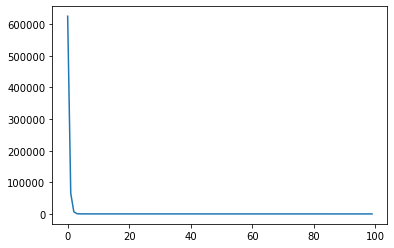

In [8]:
plt.plot(cost_lst)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

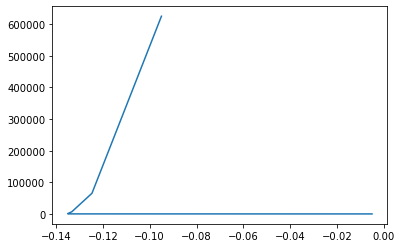

In [9]:
plt.plot(theta0_lst,cost_lst)

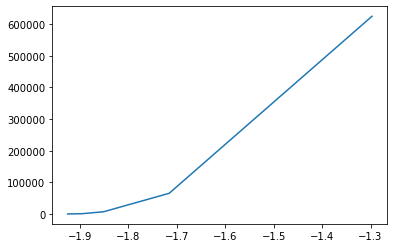

In [10]:
plt.plot(theta1_lst,cost_lst)

#### Plot all regression lines till converge

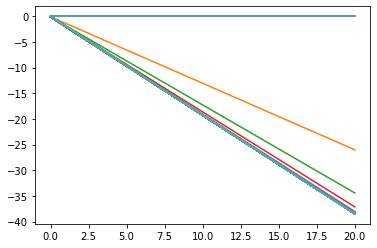

In [11]:
for i in range(len(hypo_list)):
    plt.plot(x,hypo_list[i])

#### Plot the best regression line

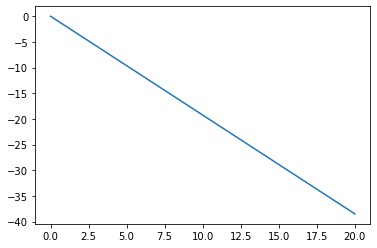

In [13]:
plt.plot(x,y_predict)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [14]:
 theta0 , theta1 , cost_func , theta0_lst , theta1_lst , cost_lst,hypo_list = gradient_descent(x,y,100,0,0,.001)
    

In [15]:
y_predict = theta0 + theta1 * x

In [16]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.9976984742382373

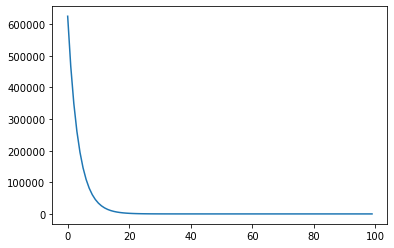

In [17]:
plt.plot(cost_lst)

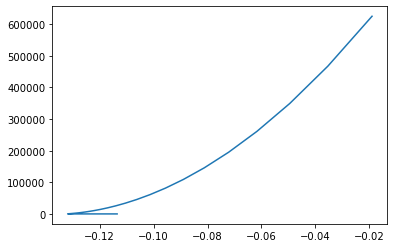

In [18]:
plt.plot(theta0_lst,cost_lst)


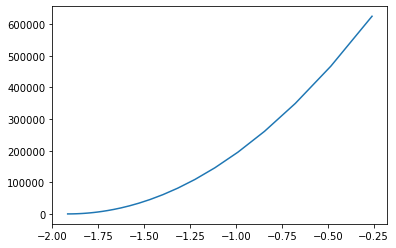

In [19]:
plt.plot(theta1_lst,cost_lst)

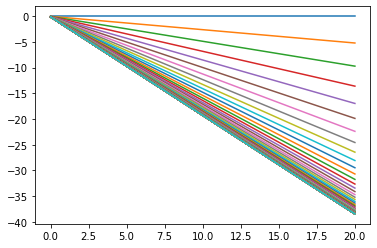

In [20]:
for i in range(len(hypo_list)):
    plt.plot(x,hypo_list[i])

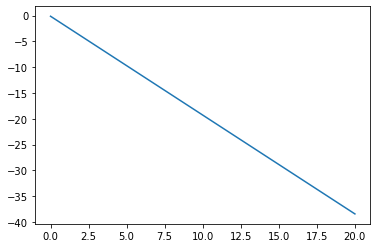

In [21]:
plt.plot(x,y_predict)

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [31]:
def minibatch_gradient_descent(x,y,b,theta0=0,theta1=0,alpha=0.001,n=1000):
  m= len(x)
  list_lossfunction=[]
  list_theta0=[]
  list_theta1=[]
  b=int(b)
  x = x.reshape(int(m/b),b)
  y = y.reshape(int(m/b),b)
  x0 =np.ones(m).reshape(int(m/b),b)
  for j in range(n):
    for i in range(int(m/b)):
      h = theta0 * x0[i] + theta1 * x[i]
      lossfunction = 0.5 * np.sum(( h - y[i] )**2)/b
      diff_theta0 = np.sum((h - y[i]))/b
      diff_theta1 = np.sum((h - y[i])*x[i])/b
      theta0 -= alpha*diff_theta0
      theta1 -= alpha*diff_theta1
      list_lossfunction.append(lossfunction)
      list_theta0.append(theta0)
      list_theta1.append(theta1)
    gredient = (diff_theta0**2 + diff_theta1**2)**0.5
    if gredient < 0.0001:
      break
  return list_theta0,list_theta1,list_lossfunction,theta0,theta1

In [32]:
 list_theta0,list_theta1,list_lossfunction,theta0,theta1 = minibatch_gradient_descent(x,y,10,theta0=0,theta1=0,alpha=0.001,n=1000)   

In [33]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.9976984742382373

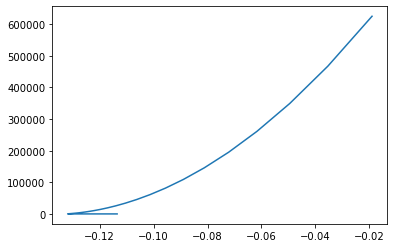

In [34]:
plt.plot(theta0_lst,cost_lst)


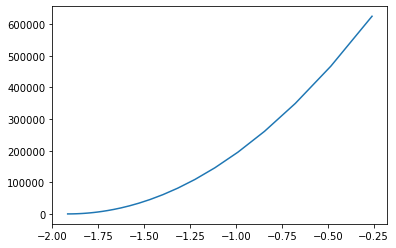

In [35]:
plt.plot(theta1_lst,cost_lst)

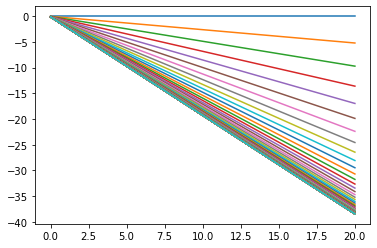

In [36]:
for i in range(len(hypo_list)):
    plt.plot(x,hypo_list[i])

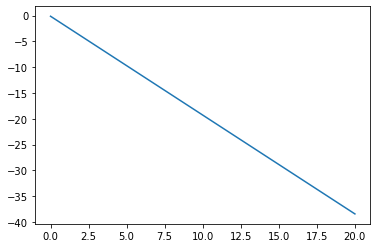

In [37]:
plt.plot(x,y_predict)


## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [180]:
#second trail
import numpy as np
 



theta0 = 0 
theta1 = 0
eta = .005

def stocastic(x,y,theta0,theta1):
  x0 = np.ones(len(x))
  cost_lst = []
  theta0_lst = []
  theta1_lst = []
  hypo_lst = []  
  
  for j in range(1000):
    for i in range(len(x)):
      predicted_value = theta0 * x0[i] + theta1 * x[i]
     
      
      diff_theta0 = (predicted_value - y[i]) * x0[i]
      diff_theta1 = (predicted_value - y[i]) *x[i]
      theta0 = theta0 - (eta * diff_theta0)
      theta1 = theta1 - (eta * diff_theta1)
      cost_func = (1/2)*np.square((predicted_value - y[i]))
      cost_lst.append(cost_func)
      theta0_lst.append(theta0)
      theta1_lst.append(theta1)
      hypo_lst.append(predicted_value)
      

      
      gradient = (diff_theta0**2 + diff_theta1**2)**.5
      

      if gradient <= .001:
        break
    
  return  theta0 , theta1 , cost_func , theta0_lst , theta1_lst , cost_lst,hypo_lst
  










In [181]:
theta0 , theta1 , cost_func , theta0_lst , theta1_lst , cost_lst,hypo_lst = stocastic(x,y,0,0)

In [182]:
y_predict = theta0 + theta1 * x

In [183]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.9999931234371069

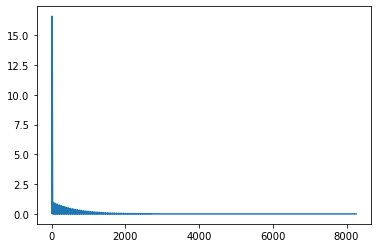

In [184]:
plt.plot(cost_lst)

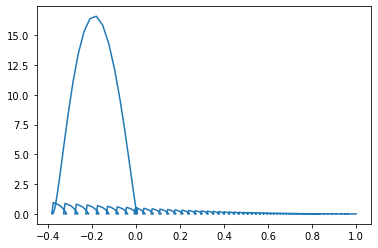

In [185]:
plt.plot(theta0_lst,cost_lst)


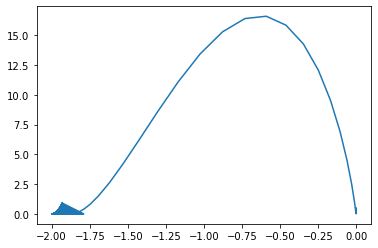

In [186]:
plt.plot(theta1_lst,cost_lst)

In [190]:
# for i in range(len(hypo_lst)):
#     plt.plot(x,hypo_lst[i])


[0.0,
 0.005,
 0.006191032435464815,
 -4.724558599778503e-05,
 -0.022690660230988244,
 -0.07580138102483054,
 -0.17795357925643956,
 -0.3512272144016014,
 -0.6196870213414641,
 -1.0073349329132215,
 -1.5356228069480387,
 -2.22073010263628,
 -3.070929561957325,
 -4.084454853481866,
 -5.248313934724351,
 -6.538429985609538,
 -7.921322315768631,
 -9.357273609750683,
 -10.804612353518722,
 -12.224446620032365,
 -13.585008380284295,
 -14.864782237012555,
 -16.05382712342924,
 -17.153111192613217,
 -18.172156387566332,
 -19.125680809863912,
 -20.03010417905623,
 -20.900690286367883,
 -21.749789443454695,
 -22.586245844144795,
 -23.415703975000913,
 -24.24139008147057,
 -25.064973379681227,
 -25.887259609655253,
 -26.708637928768724,
 -27.52931750092551,
 -28.349431730454185,
 -29.169077766667073,
 -29.988330983777633,
 -30.807251439563924,
 -31.625887730013435,
 -32.44427965294673,
 -33.26246013334096,
 -34.08045664966155,
 -34.89829231171673,
 -35.715986688486296,
 -36.53355645274236,
 -37.

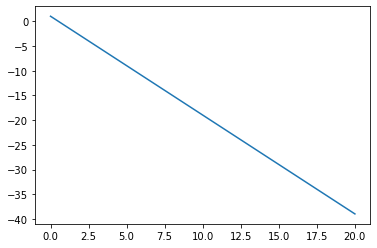

In [188]:
plt.plot(x,y_predict)